In [ ]:
"""
[점진적 학습]
- 데이터가 수집 될 때마다 학습을 계속 이어나가는 훈련방식
- 대표적인 점진적 학습 알고리즘 : 확률적 경사하강법(SGD)
[확률적 경사하강법(SGD)]
- 걍사 : 기울기
- 하강법 : 내려가는 방법
- 원하는 지점에 도달하기 위해 가장 가파른 경사를 따라 내려가는 방법을 찾는 알고리즘
- 확률적(무작위/랜덤) : 알고리즘이 알아서 내려가는 경사의 위치와 방법을 찾음
- 훈련데이터의 전체 특성들 중에서 하나씩 랜덤하게 선택하여 가장 가파른 길을 찾음
[확률적 경사하강법 순서]
- 훈련데이터에서 랜덤하게 하나의 특성을 선택
- 선택한 특성을 이용해 경사를 조금씩(아주조금씩) 체크(빠른길)하면서 내려감
- 내려 갈 수 있을 때까지 내려감
- 훈련데이터에서 다른 독립변수(특성)를 랜덤하게 선택하여 또 다시 위에서 부터 시작
"""

In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
# 데이터 셋 불러오기
file_name = "./data/07_fish.csv"
fish = pd.read_csv(file_name)
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [6]:
# 전처리
# 훈련데이터(input, target) 생성
# 변수 : fish_input, fish_target
fish_input = fish[["Weight","Length","Diagonal","Height","Width"]].to_numpy() # 2차원
fish_target = fish["Species"].to_numpy() # 1차원
print(fish_input.shape,fish_target.shape)

(159, 5) (159,)


In [7]:
# 훈련데이터와 테스트데이터로 분리
# 데이터 셋 분류
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,
                                                                      test_size=0.25,random_state=42)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(119, 5) (119,)
(40, 5) (40,)


In [8]:
# 정규화(표준화) 처리 : 다양한 단위의 범위를 일괄적인 범위로 맞추기 위해 standard 사용
# train_scaled, test_scaled
# 객체생성
ss = StandardScaler()
# 훈련시키기 - 정규화 데이터 생성
ss.fit(train_input)
# 생성된 정규화 데이터로 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled.shape,test_scaled.shape)

(119, 5) (40, 5)


In [10]:
# 확률적 경사하강법을 이용한 분류모델(SGDClassifier)
#훈련모델 생성
sc = SGDClassifier()
# 훈련
sc.fit(train_scaled,train_target)
# 검증
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

# 과소적합 발생

0.7815126050420168
0.8


In [11]:
# 파라미터 추가
"""
[loss : 손실함수]
- 조금씩 내려오면서 손실이 작은쪽을 찾아서 내려오기 위한 방법을 지정
- 학습모델이 알아서 계산하고 처리
- 분류 결과에 만족할 때까지 내려감
- log : 로지스틱 손실함수(이진분류에 사용) - 경사를 따라 내려갈 때 내려가는 방향선택 : 손실이 많냐 적냐
"""
#훈련모델 생성
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)
# 훈련
sc.fit(train_scaled,train_target)
# 검증
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [12]:
# 점진적으로 기존 혼련에 이어서 계속 훈련하기
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [13]:
# 반복횟수(max_iter or 에포크)
sc = SGDClassifier(loss="log",random_state=42)
# 정확도를 담을 리스트 변수 생성
train_score = []
test_score = []

# 종속변수 데이터 추출해 변수에 담기
classes = np.unique(train_target)
# 300번 강제로 훈련 수행 및 훈련 테스트, 정확도 조회
for _ in range(300):
    # 최초 반복에 사용한 훈련에 이어 계속 훈련
    sc.partial_fit(train_scaled,train_target,classes=classes)
    # 훈련 및 테스트 정확도 리스트변수에 담기
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))
    


C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. 

C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. 

C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. 

In [14]:
print(len(train_score),len(test_score))

300 300


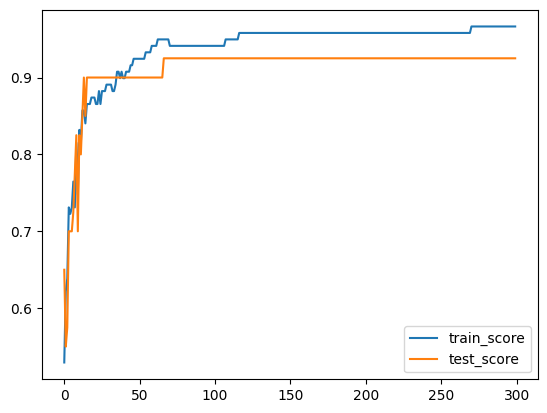

In [16]:
# 반복횟수 정확도 확인하기(반복 횟수 지점 찾기)
plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

In [18]:
# 그래프 보고 판단후 max_iter 수정
# tol=None : SGD는 어느정도 지점에 도달했다고 판단하면 반복을 강제종료시킴
# 우리가 지정한 max_iter만큼 무조건 반복을 수행하기 위하여 설정하는 값
#훈련모델 생성
sc = SGDClassifier(loss="log", max_iter=100, random_state=42, tol=None)
# 훈련
sc.fit(train_scaled,train_target)
# 검증
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


C:\Users\Administrator\anaconda3\envs\pknu_base\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
